# IBM Attrition Prediction with Artificial Neural Networks

<img src="https://raw.githubusercontent.com/Masterx-AI/Project_Attrition_Analysis_for_IBM/main/ibm.jpg" alt="IBM">

## HR Project - IBM Attrition Analysis using Dataset Corpus

## Description

IBM is an American MNC operating in around 170 countries with major business verticals as computing, software, and hardware.
Attrition is a major risk to service-providing organizations where trained and experienced people are the assets of the company. The organization would like to identify the factors which influence the attrition of employees.

## Acknowledgements

This dataset has been referred from https://www.kaggle.com/yasserh/ibm-attrition-dataset

#### Picture and the dataset taken from Kaggle by IBM.

___

## Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
concrete_data = pd.read_csv('IBM.csv')
concrete_data.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [3]:
concrete_data.shape

(1470, 13)

In [4]:
concrete_data.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


In [5]:
concrete_data.isnull().sum()

Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64

In [6]:
print("Number of NaN values: {}.".format(concrete_data.isnull().sum().sum()))

Number of NaN values: 0.


In [7]:
print("Number of duplicated rows: {}.".format(concrete_data.duplicated().sum()))

Number of duplicated rows: 0.


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
concrete_data["EducationField"] = le.fit_transform(concrete_data['EducationField'])
concrete_data["MaritalStatus"] = le.fit_transform(concrete_data['MaritalStatus'])
concrete_data["Attrition"] = le.fit_transform(concrete_data['Attrition'])
concrete_data["Department"] = le.fit_transform(concrete_data['Department'])

In [9]:
concrete_data.head(10)

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,2,1,2,1,2,4,2,5993,8,1,6
1,49,0,1,8,1,1,3,2,1,5130,1,3,10
2,37,1,1,2,2,4,4,3,2,2090,6,3,0
3,33,0,1,3,4,1,4,3,1,2909,1,3,8
4,27,0,1,2,1,3,1,2,1,3468,9,3,2
5,32,0,1,2,2,1,4,4,2,3068,0,2,7
6,59,0,1,3,3,3,3,1,1,2670,4,2,1
7,30,0,1,24,1,1,4,3,0,2693,1,3,1
8,38,0,1,23,3,1,4,3,2,9526,0,3,9
9,36,0,1,27,3,3,3,3,1,5237,6,2,7


<AxesSubplot:>

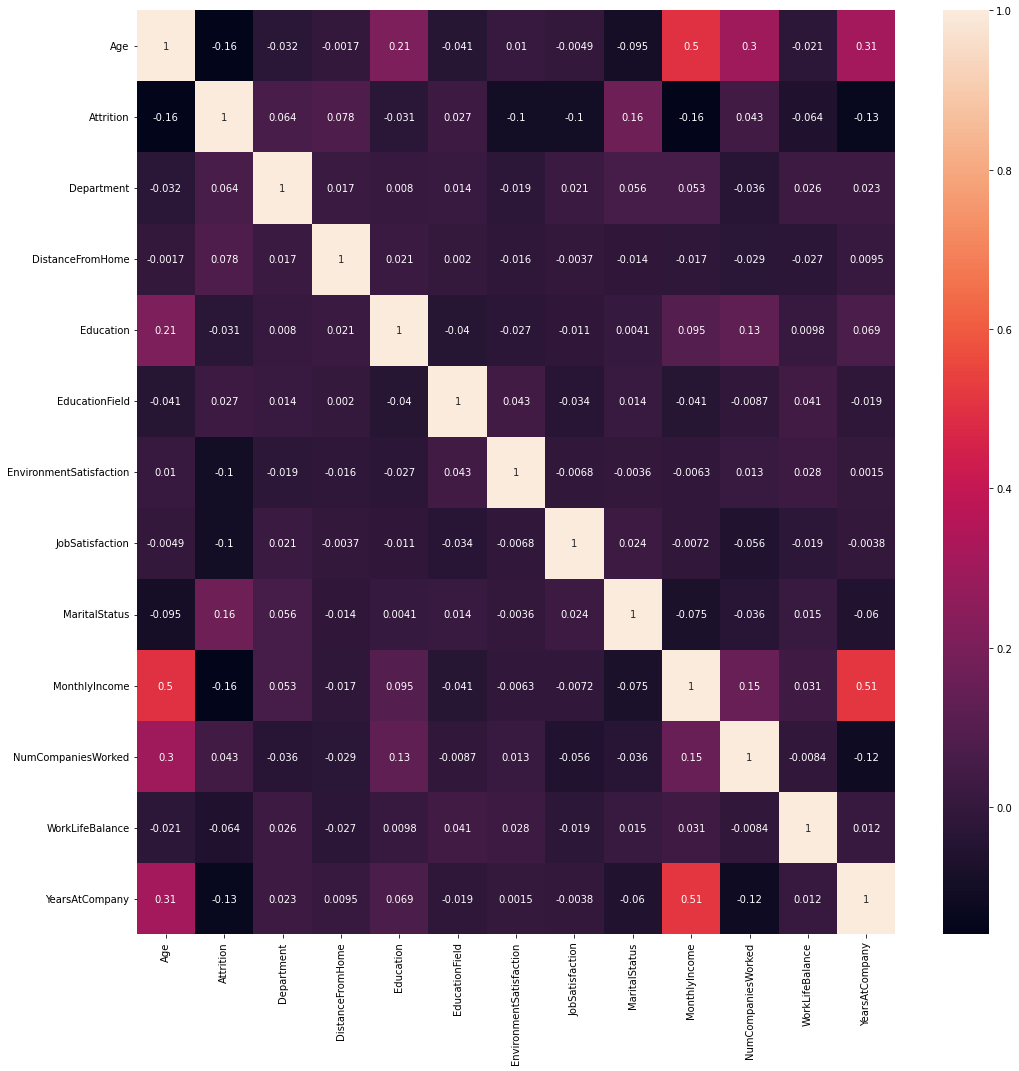

In [10]:
# Creating correlation matrix heat map
plt.figure(figsize = (17, 17))
sns.heatmap(concrete_data.corr(), annot = True)

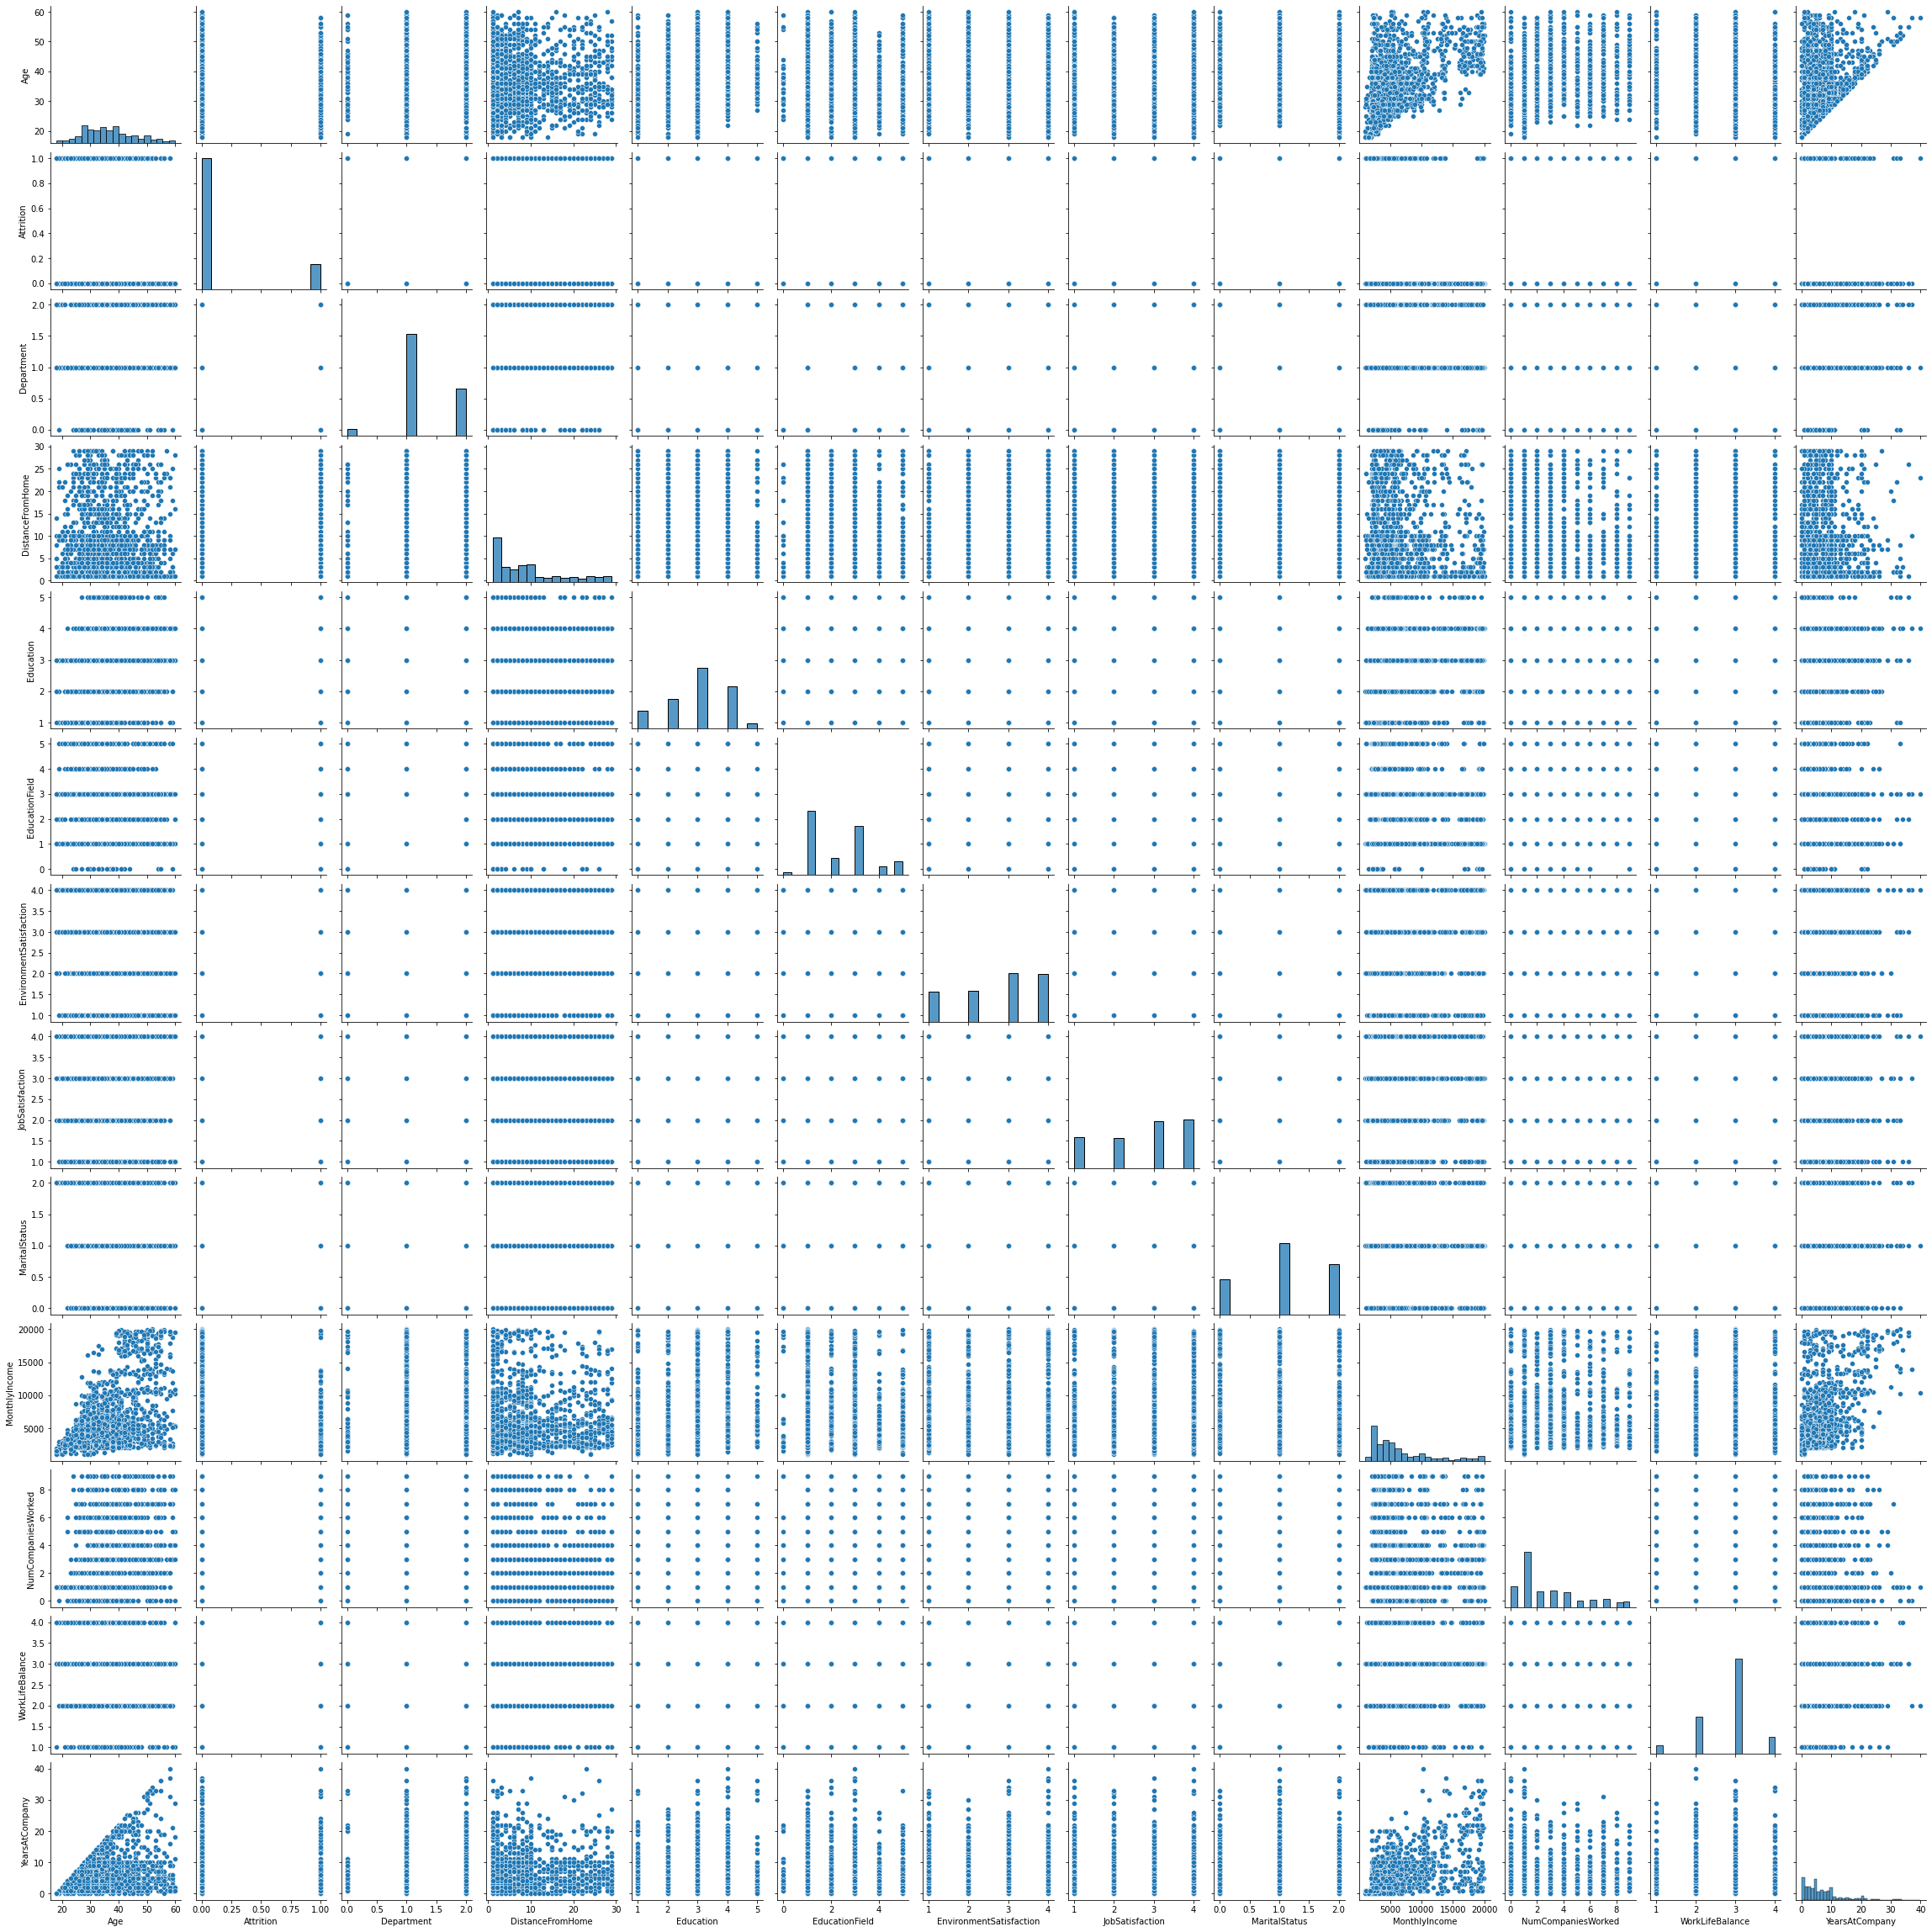

In [11]:
sns.pairplot(concrete_data)
plt.show()

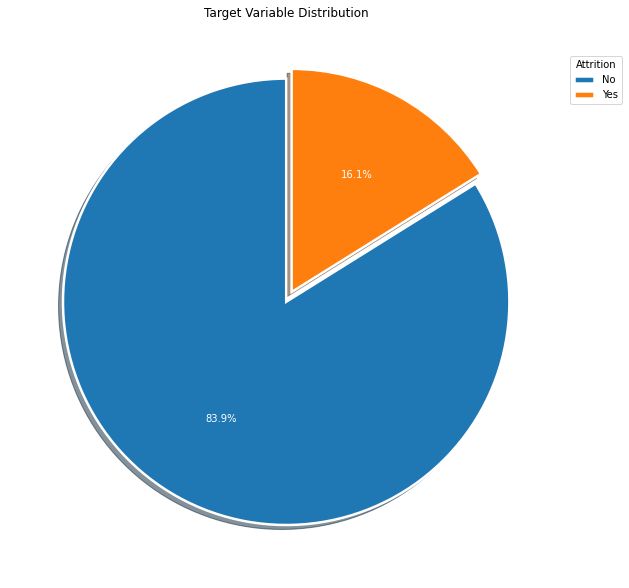

In [12]:
import matplotlib.patheffects as path_effects

explode = (0, 0.05)
fig = plt.figure(figsize = (10, 17), facecolor='w')
out_df=pd.DataFrame(concrete_data.groupby('Attrition')['Attrition'].count())

patches, texts, autotexts = plt.pie(out_df['Attrition'], autopct='%1.1f%%',
                                    textprops={'color': "w"},
                                    explode=explode,
                                    startangle=90, shadow=True)

for patch in patches:
    patch.set_path_effects({path_effects.Stroke(linewidth=2.5,
                                                foreground='w')})
plt.title('Target Variable Distribution')
plt.legend(labels=['No','Yes'], bbox_to_anchor=(1., .95), title="Attrition")

In [13]:
concrete_data_columns = concrete_data.columns

target = concrete_data["Attrition"]
predictors = concrete_data.drop(["Attrition"], axis=1)

In [14]:
target.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int32

In [15]:
predictors.head()

,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,2,1,2,1,2,4,2,5993,8,1,6
1,49,1,8,1,1,3,2,1,5130,1,3,10
2,37,1,2,2,4,4,3,2,2090,6,3,0
3,33,1,3,4,1,4,3,1,2909,1,3,8
4,27,1,2,1,3,1,2,1,3468,9,3,2


In [16]:
n_cols = predictors.shape[1]
n_cols

12

___

## Keras

Recall from the videos that Keras normally runs on top of a low-level library such as TensorFlow. This means that to be able to use the Keras library, you will have to install TensorFlow first and when you import the Keras library, it will be explicitly displayed what backend was used to install the Keras library. In CC Labs, we used TensorFlow as the backend to install Keras, so it should clearly print that when we import Keras.

In [17]:
import warnings
warnings.filterwarnings("ignore")
import keras

In [18]:
from keras.models import Sequential
from keras.layers import Dense

## Build a Neural Network

Define a function that defines our regression model for us so that we can conveniently call it to create our model.

In [19]:
def regression_model():
    # 1-Create model
    model = Sequential()   
    model.add(Dense(8, activation="relu", input_shape=(n_cols,))) 
    # Creating second hidden layer:
    model.add(Dense(16, activation="relu"))
    # Creating output layer:
    model.add(Dense(1, activation="sigmoid"))
    
    # 2-Compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=42)

In [22]:
model = regression_model()

In [23]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model_history = model.fit(predictors, target, epochs=64, batch_size=32, validation_split=0.13)

Epoch 1/64
40/40 [==============================] - 1s 4ms/step - loss: 100.6004 - accuracy: 0.5368 - val_loss: 17.3924 - val_accuracy: 0.8594
Epoch 2/64
40/40 [==============================] - 0s 2ms/step - loss: 10.8541 - accuracy: 0.8114 - val_loss: 1.2669 - val_accuracy: 0.8594
Epoch 3/64
40/40 [==============================] - 0s 2ms/step - loss: 0.8270 - accuracy: 0.7926 - val_loss: 0.5181 - val_accuracy: 0.8594
Epoch 4/64
40/40 [==============================] - 0s 2ms/step - loss: 0.6670 - accuracy: 0.8059 - val_loss: 0.4210 - val_accuracy: 0.8646
Epoch 5/64
40/40 [==============================] - 0s 1ms/step - loss: 0.6098 - accuracy: 0.8059 - val_loss: 0.6547 - val_accuracy: 0.6771
Epoch 6/64
40/40 [==============================] - 0s 2ms/step - loss: 0.6053 - accuracy: 0.7973 - val_loss: 0.4436 - val_accuracy: 0.8594
Epoch 7/64
40/40 [==============================] - 0s 1ms/step - loss: 0.7729 - accuracy: 0.7895 - val_loss: 0.3873 - val_accuracy: 0.8594
Epoch 8/64
40/40

40/40 [==============================] - 0s 1ms/step - loss: 0.6317 - accuracy: 0.7997 - val_loss: 0.9213 - val_accuracy: 0.3385
Epoch 60/64
40/40 [==============================] - 0s 2ms/step - loss: 0.5244 - accuracy: 0.8200 - val_loss: 0.5243 - val_accuracy: 0.8646
Epoch 61/64
40/40 [==============================] - 0s 2ms/step - loss: 0.6534 - accuracy: 0.7801 - val_loss: 1.5597 - val_accuracy: 0.8594
Epoch 62/64
40/40 [==============================] - 0s 2ms/step - loss: 2.0834 - accuracy: 0.7590 - val_loss: 1.3280 - val_accuracy: 0.8594
Epoch 63/64
40/40 [==============================] - 0s 2ms/step - loss: 0.8919 - accuracy: 0.8013 - val_loss: 0.3925 - val_accuracy: 0.8542
Epoch 64/64
40/40 [==============================] - 0s 2ms/step - loss: 0.9946 - accuracy: 0.7762 - val_loss: 0.6561 - val_accuracy: 0.6250


In [24]:
loss_val = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
loss_val

14/14 [==============================] - 0s 2ms/step - loss: 0.6747 - accuracy: 0.5737


[0.6747448444366455, 0.5736961364746094]

In [25]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 104       
                                                                 
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 265
Trainable params: 265
Non-trainable params: 0
_________________________________________________________________


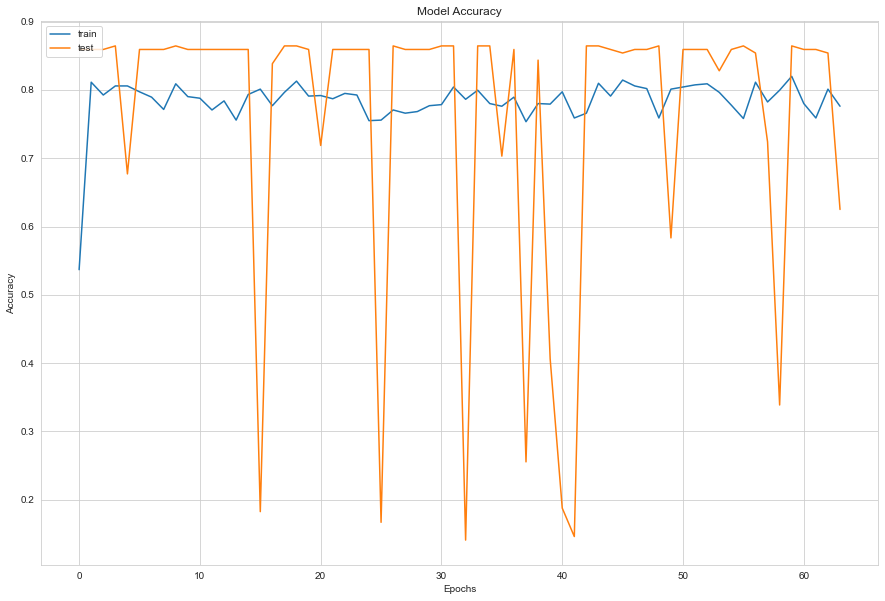

In [27]:
plt.figure(figsize=(15, 10))
sns.set_style('whitegrid')
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')

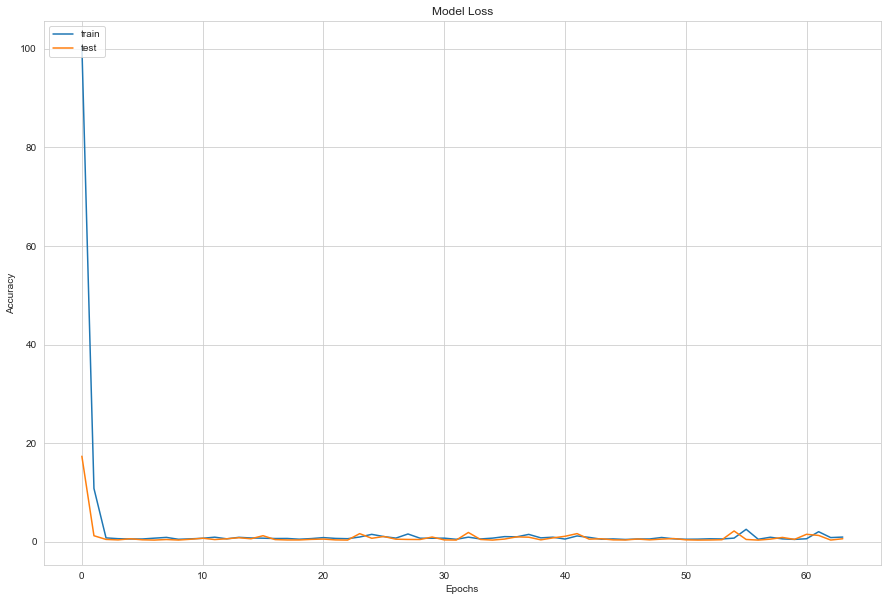

In [28]:
plt.figure(figsize=(15, 10))
sns.set_style('whitegrid')
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')

___

## Mean Squared Error

In [29]:
from sklearn.metrics import mean_squared_error

In [30]:
mean_square_error = mean_squared_error(y_test, y_pred)
mean = np.mean(mean_square_error)
standard_deviation = np.std(mean_square_error)
print(f"Mean: {mean}\nStandard Deviation: {standard_deviation}")

Mean: 0.2410137104635764
Standard Deviation: 0.0


In [31]:
total_mean_squared_errors = 50
epochs = 50
mean_squared_errors = []
for i in range(0, total_mean_squared_errors):
    X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=i)
    model.fit(X_train, y_train, epochs=epochs, verbose=0)
    MSE = model.evaluate(X_test, y_test, verbose=0)
    y_pred = model.predict(X_test)
    mean_square_error = mean_squared_error(y_test, y_pred)
    mean_squared_errors.append(mean_square_error)

mean_squared_errors = np.array(mean_squared_errors)
mean = np.mean(mean_squared_errors)
standard_deviation = np.std(mean_squared_errors)

print("\n" + str(total_mean_squared_errors) + " mean squared errors without normalized data. Total number of epochs for each training is: " + str(epochs) + "\n")
print("Mean: "+ str(mean))
print("Standard Deviation: "+ str(standard_deviation))


50 mean squared errors without normalized data. Total number of epochs for each training is: 50

Mean: 0.16231385883164048
Standard Deviation: 0.11980751817325828


## Prediction

In [32]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

### System success on confusion matrix

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)  #  Comparing results
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[357   9]
 [ 62  13]]


### Accuracy score

In [34]:
from sklearn.metrics import accuracy_score
print(f"\nAccuracy score: {accuracy_score(y_test, y_pred)}")


Accuracy score: 0.8390022675736961


### Making prediction from predictors DataFrame

In [35]:
predict = predictors[1:2]
prediction = model.predict(predict)

# İf predcition value is closter to the 0, that means it is most likely to be No.
# İf predcition value is closter to the 1, that means it is most likely to be Yes.

if prediction <= 0.5:
    print('\nModel predicted as No.')
else:
    print('\nModel predicted as Yes.')


Model predicted as No.


In [36]:
class_map = {0: "No", 
            1: "Yes"}

In [37]:
target_model = target[1:2].iloc
print(f'\nActual attrition: {class_map[int(target_model[0])]}.')


Actual attrition: No.
